
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 3: Logistic Regression EXERCISE

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Classical Data Analysis (2020-12-21)

Open original notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-cda-2020/blob/main/Session_3/Session_3_Regularization_and_Poly_regression_EXERCISE.ipynb)

**Resources:**
* Auréliene Géron, Hands On ML with SKlearn, Keras and TF

# Regression with regularization

#### We will using the Boston Housing Dataset available in sklearn and we will extend it with  5 additional features of random noise to test each algorithm’s ability to filter out irrelevant information:

- **Examine the results of applying Linear Regression, Lasso Regression, Ridge Regression and Elastic Net on the features scores**
- **Try to modify the hyperparameters lambda and describe how it affects the parmeter scores**

This is the very same exercise that we did in class, try to go in depth into the tradeoffs of lambda (alpha) and others

### Import libraries and dataset from sklearn

In [12]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import mean_squared_error

boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Add Noise to original dataset

In [13]:
n_houses = boston_df.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston_df, rand_noise_df], axis=1)
y = boston['target']


In [14]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Noise_1,Noise_2,Noise_3,Noise_4,Noise_5
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,0.661121,0.241159,0.953583,0.827271,0.017726
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,0.726147,0.187623,0.272374,0.897391,0.424791
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,0.363112,0.791657,0.111797,0.723686,0.555622
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,0.187469,0.368642,0.029125,0.509723,0.900653
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,0.979575,0.733803,0.713236,0.525267,0.282277


In [15]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Implement classical linear regression, Lasso, Ridge and ElasticNet (use the default parameter of sklearn) and describe how the scores of the features change

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

# CREATE MODEL INSTANCES
boston_lr = LinearRegression()
boston_ls = Lasso()
boston_rg = Ridge(alpha=10)
boston_en = ElasticNet()


##### NORMALIZE DATA USING THE ```StandardScaler``` PROVIDED BY sklearn

In [17]:
from sklearn.preprocessing import StandardScaler

boston_ss = StandardScaler()
X_scaled = boston_ss.fit_transform(X=X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=235)

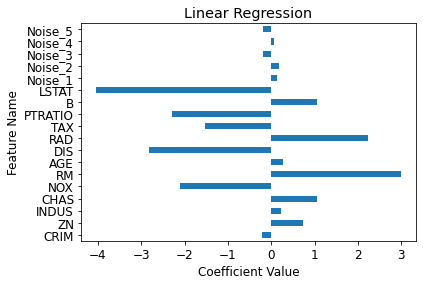

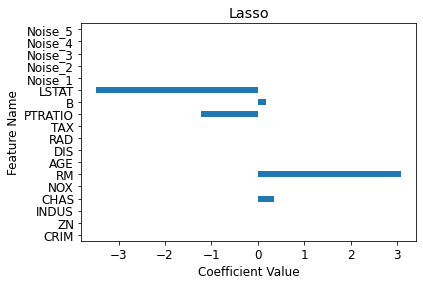

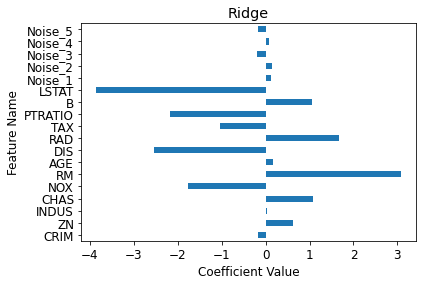

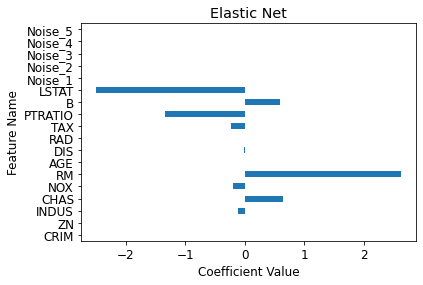

In [18]:
#Fitting models

lr = boston_lr.fit(X_train, y_train)
ls = boston_ls.fit(X_train, y_train)
rg = boston_rg.fit(X_train, y_train)
en = boston_en.fit(X_train, y_train)

#Plotting scores

pd.Series(lr.coef_, index = X.columns).plot(kind='barh')
plt.title('Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

pd.Series(ls.coef_, index = X.columns).plot(kind='barh')
plt.title('Lasso')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

pd.Series(rg.coef_, index = X.columns).plot(kind='barh')
plt.title('Ridge')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

pd.Series(en.coef_, index = X.columns).plot(kind='barh')
plt.title('Elastic Net')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.show()

In [19]:
results = pd.DataFrame()

results['Feature Name'] = X.columns
results['Linear Regression'] = lr.coef_
results['Lasso'] = ls.coef_
results['Ridge'] = rg.coef_
results['Elastic Net'] = en.coef_

results

,Feature Name,Linear Regression,Lasso,Ridge,Elastic Net
0,CRIM,-0.209227,-0.000000,-0.169613,-0.000000
1,ZN,0.741280,0.000000,0.618571,0.000000
2,INDUS,0.218007,-0.000000,0.035618,-0.112192
3,CHAS,1.051427,0.340719,1.072807,0.635905
4,NOX,-2.103254,-0.000000,-1.768821,-0.202282
5,RM,2.985049,3.075163,3.074850,2.618869
6,AGE,0.272067,-0.000000,0.165283,-0.000000
7,DIS,-2.823617,-0.000000,-2.546644,-0.014043
8,RAD,2.243059,-0.000000,1.669275,-0.000000
9,TAX,-1.520157,-0.000000,-1.045733,-0.224970


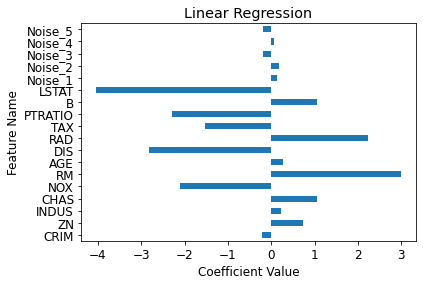

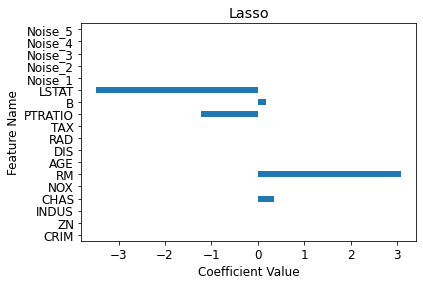

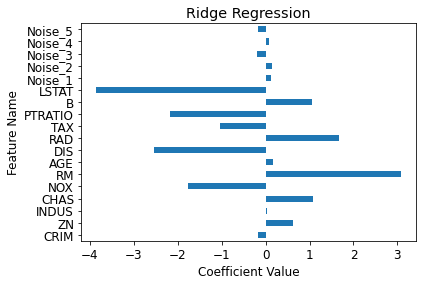

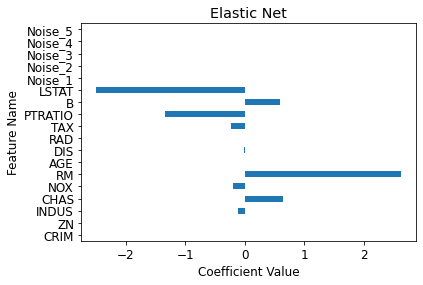

,Feature Name,Linear Regression,Lasso,Ridge Regression,Elastic Net
0,CRIM,-0.209227,-0.000000,-0.169613,-0.000000
1,ZN,0.741280,0.000000,0.618571,0.000000
2,INDUS,0.218007,-0.000000,0.035618,-0.112192
3,CHAS,1.051427,0.340719,1.072807,0.635905
4,NOX,-2.103254,-0.000000,-1.768821,-0.202282
5,RM,2.985049,3.075163,3.074850,2.618869
6,AGE,0.272067,-0.000000,0.165283,-0.000000
7,DIS,-2.823617,-0.000000,-2.546644,-0.014043
8,RAD,2.243059,-0.000000,1.669275,-0.000000
9,TAX,-1.520157,-0.000000,-1.045733,-0.224970


In [20]:
## FITTING OF THE MODELS AND RESULTS

#Victor's Solution

models = [(boston_lr, 'Linear Regression'),
           (boston_ls, 'Lasso'),
           (boston_rg, "Ridge Regression"),
           (boston_en, "Elastic Net")]

df = pd.DataFrame()
df['Feature Name'] = X.columns
for model in models:
    model[0].fit(X_train, y_train)
    pd.Series(model[0].coef_, 
              index=X.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()
    # Create a column name for that reflects the name of the model
    column_name = model[1]

    # Create a column of coefficient values
    df[column_name] = model[0].coef_

df

#### Decribe the results

- We can see that linear regression assigned non-zero values to all 5 of our noise features, despite none of them having any predictive power. Interestingly, these noise features have coefficients with magnitudes similar to some of the real features in the dataset.
- As we hoped, Lasso did a good job of reducing all 5 of our noise features to 0, as well as many of the real features from the dataset. This is indeed a much simpler model than given by linear regression
- Ridge Regression makes a similar mistake as unregularized linear regression, assigning coefficient values to our noise features. We also see some features have very small coefficients.
- Much like Lasso, Elastic Net makes the coefficients of several features 0. It however does not make as many coefficients 0 as Lasso does.

### Compute the Model Scores

In [21]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr_r2 = r2_score(y_test, lr.predict(X_test))
lr_mse = mean_squared_error(y_test, lr.predict(X_test))

ls_r2 = r2_score(y_test, ls.predict(X_test))
ls_mse = mean_squared_error(y_test, ls.predict(X_test))

rg_r2 = r2_score(y_test, rg.predict(X_test))
rg_mse = mean_squared_error(y_test, rg.predict(X_test))

en_r2 = r2_score(y_test, en.predict(X_test))
en_mse = mean_squared_error(y_test, en.predict(X_test))

print(f'Mean Squared Error of Linear Regression {lr_mse:.2f}')
print(f'R2 score of Linear Regression {lr_r2:.2f}')
print("__________________________________________________")

print(f'Mean Squared Error of Lasso {ls_mse:.2f}')
print(f'R2 score of Lasso {ls_r2:.2f}')
print("__________________________________________________")

print(f'Mean Squared Error of Ridge Regression {rg_mse:.2f}')
print(f'R2 score of Ridge Regression {rg_r2:.2f}')
print("__________________________________________________")

print(f'Mean Squared Error of Elastic Net {en_mse:.2f}')
print(f'R2 score of ElasticNet {en_r2:.2f}')

Mean Squared Error of Linear Regression 23.65
R2 score of Linear Regression 0.66
__________________________________________________
Mean Squared Error of Lasso 24.91
R2 score of Lasso 0.65
__________________________________________________
Mean Squared Error of Ridge Regression 23.60
R2 score of Ridge Regression 0.67
__________________________________________________
Mean Squared Error of Elastic Net 24.63
R2 score of ElasticNet 0.65


In [22]:
print(f'Mean Squared Error of Linear Regression {lr_mse:.2f}')
print(f'Mean Squared Error of Lasso {ls_mse:.2f}')
print(f'Mean Squared Error of Ridge Regression {rg_mse:.2f}')
print(f'Mean Squared Error of Elastic Net {en_mse:.2f}')

Mean Squared Error of Linear Regression 23.65
Mean Squared Error of Lasso 24.91
Mean Squared Error of Ridge Regression 23.60
Mean Squared Error of Elastic Net 24.63


In [23]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Victor's Solution

models = [(boston_lr, 'Linear Regression'),
           (boston_ls, 'Lasso'),
           (boston_rg, "Ridge Regression"),
           (boston_en, "Elastic Net")]

for model in models:
    r2 = r2_score(y_test, model[0].predict(X_test))
    mse = mean_squared_error(y_test, model[0].predict(X_test))
    print(model[1])
    print(f"r2 score of {model[1]}: {r2:.3f}")
    print(f"Mean Squared Error of {model[1]}: {mse:.3f}")
    print("#======================================#")

Linear Regression
r2 score of Linear Regression: 0.664
Mean Squared Error of Linear Regression: 23.650
#======================================#
Lasso
r2 score of Lasso: 0.647
Mean Squared Error of Lasso: 24.910
#======================================#
Ridge Regression
r2 score of Ridge Regression: 0.665
Mean Squared Error of Ridge Regression: 23.603
#======================================#
Elastic Net
r2 score of Elastic Net: 0.651
Mean Squared Error of Elastic Net: 24.626
#======================================#


This might seem counter-intuitive, but it is important to remember the ridge regression model traded some variance for bias, which ultimately lead to an overall smaller error. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has increased.
Interestingly, Lasso and Elastic Net had a higher MSE than Linear Regression. But does that mean that these models are unequivocally worse? I would argue not, as the Lasso and Elastic Net models also performed feature selection, which gives us better interpretability of the models. Coefficients are interpreted as the change in dependent variable with a one unit increase in predictor value, with all other predictors held constant. In the case of complex models, the assumption of holding all other predictors constant cannot reasonably be met.

### Alpha parameter:  Apply Lasso with different values of alpha and describe how the parameters scores change


- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [24]:
names = names = X.columns


# Create a function called lasso,
def lasso(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of lasso regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names

    # Create Linear regression and Elastic Net coef column to compare results
    df['Linear Regression'] = lr.coef_
    df['Elastic Net'] = en.coef_
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a lasso regression with that alpha value,

        lasso = Lasso(alpha=alpha)

        # Fit the lasso regression
        lasso.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = lasso.coef_
        
    # Return the dataframe  
    return df

In [25]:
for Alpha in [0,0.0001,0.5,10]:
    lr.fit(X_train, y_train)
    pd.Series(lr.coef_, alpha=Alpha, 
              index=X.columns).plot(kind='barh')
    plt.title(Alpha)
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

TypeError: ignored

In [26]:
lasso([0, .0001, .5, 10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5528.867386486949, tolerance: 4.2716295415019765
  positive)


,Feature Name,Linear Regression,Elastic Net,Alpha = 0.000000,Alpha = 0.000100,Alpha = 0.500000,Alpha = 10.000000
0,CRIM,-0.209227,-0.000000,-0.948685,-0.948397,-0.115265,-0.0
1,ZN,0.741280,0.000000,1.077232,1.076764,0.000000,0.0
2,INDUS,0.218007,-0.112192,0.140274,0.139348,-0.000000,-0.0
3,CHAS,1.051427,0.635905,0.692490,0.692508,0.397079,0.0
4,NOX,-2.103254,-0.202282,-2.072143,-2.071280,-0.000000,-0.0
5,RM,2.985049,2.618869,2.669426,2.669609,2.974259,0.0
6,AGE,0.272067,-0.000000,0.031321,0.030878,-0.000000,-0.0
7,DIS,-2.823617,-0.014043,-3.096452,-3.096078,-0.170569,0.0
8,RAD,2.243059,-0.000000,2.649657,2.647807,-0.000000,-0.0
9,TAX,-1.520157,-0.224970,-2.020567,-2.018804,-0.000000,-0.0


#### Describe the above results



*   As expected, when alpha is increased more coefficients are equal to 0. This indicates High sparcity the bigger alpha is.  
*   List item



### Apply Ridge with different values of alpha and describe how the parameters scores change
- Complete the function and apply it to the following values: [0, .0001, .5, 10]
- Describe the results

In [32]:
names = names = X.columns

# Create a function called lasso,
def ridge(alphas):
    '''
    Takes in a list of alphas. Outputs a dataframe containing the coefficients of ridge regressions from each alpha.
    '''
    # Create an empty data frame
    df = pd.DataFrame()
    
    # Create a column of feature names
    df['Feature Name'] = names
    
    # Create Linear regression and Elastic Net coef column to compare results
    df['Linear Regression'] = lr.coef_
    df['Elastic Net'] = en.coef_
    
    # For each alpha value in the list of alpha values,
    for alpha in alphas:
        # Create a Ridge regression with that alpha value,
        
        #********************************************************
        ridge = Ridge(alpha=alpha)
        
        # Fit the lasso regression
        ridge.fit(X_scaled, y)
        
        # Create a column name for that alpha value
        column_name = 'Alpha = %f' % alpha

        # Create a column of coefficient values
        df[column_name] = ridge.coef_
        
    # Return the dataframe  
    return df

In [33]:
#I've added the optimal alpha obtained with crossvalidation via sklearn's CV function
ridge([0, .00001, .5, 10, 0.1])

,Feature Name,Linear Regression,Elastic Net,Alpha = 0.000000,Alpha = 0.000010,Alpha = 0.500000,Alpha = 10.000000,Alpha = 0.100000
0,CRIM,-0.215967,-0.000000,-0.949845,-0.949845,-0.945458,-0.877573,-0.948960
1,ZN,0.795810,0.000000,1.129422,1.129422,1.121359,0.995537,1.127795
2,INDUS,0.231896,-0.112193,0.159102,0.159102,0.146752,-0.029204,0.156600
3,CHAS,1.018476,0.635905,0.689872,0.689872,0.691655,0.716696,0.690233
4,NOX,-2.036732,-0.202281,-2.050232,-2.050232,-2.036182,-1.804928,-2.047404
5,RM,2.962200,2.618869,2.685863,2.685863,2.690216,2.754260,2.686743
6,AGE,0.240770,-0.000000,0.045124,0.045124,0.041787,-0.009087,0.044450
7,DIS,-2.869050,-0.014043,-3.118196,-3.118196,-3.104585,-2.867439,-3.115464
8,RAD,2.306229,-0.000000,2.713743,2.713742,2.676585,2.129832,2.706224
9,TAX,-1.705705,-0.224970,-2.179093,-2.179092,-2.143931,-1.644920,-2.171967


In practice, we will not manually look for the best alpha coefficient. Both in Lasso and ridge regression, the alpha is a hyperparameter. Therefore, we will find the best one via crossvalidation. Fortunately, sklearn has a function that performs CV to find the optimal alpha automatically. 

In [17]:
from sklearn.linear_model import LassoCV

reg_l = LassoCV(max_iter = 5000, cv = 20, normalize=True).fit(X_train, y_train)
reg_l.alpha_

0.003571182456192666

In [43]:
from sklearn.linear_model import RidgeCV

reg_r = RidgeCV(cv = 20, normalize=True).fit(X_train, y_train)
reg_r.alpha_

0.1

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print('%s Cross Validation Score: %s' % (Model.__name__,
                      cross_val_score(model, X_train, y_train, cv=20).mean()))

Ridge Cross Validation Score: 0.7014081364757999
Lasso Cross Validation Score: 0.6460580353307865


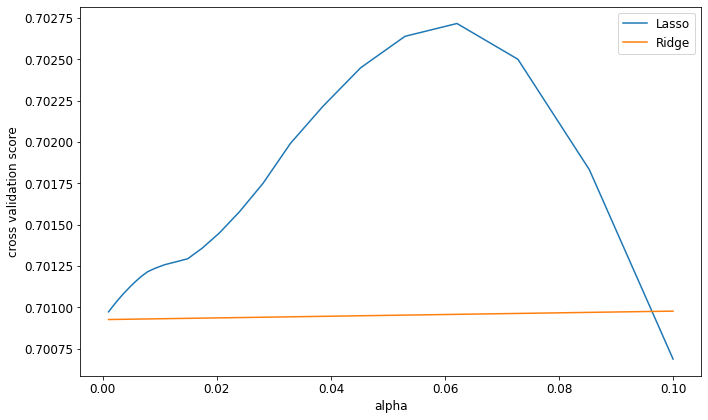

In [40]:
import numpy as np
from matplotlib import pyplot as plt

alphas = np.logspace(-3, -1, 30)

plt.figure(figsize=(10, 6))

for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X_train, y_train, cv=20).mean()
            for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)

plt.legend()
plt.xlabel('alpha')
plt.ylabel('cross validation score')
plt.tight_layout()
plt.show()